<a href="https://colab.research.google.com/github/massaoHigaskino/DSWP/blob/project%2Fdanielle_upstream/dswp_grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CRISP-DM PROCESS**

#**1BU - BUSINESS UNDERSTANDING**

> **Objstivo desta fase:** Compreender o que se deseja alcançar ou conhecer a partir de uma perspectiva de negócios.

Desenvolver um Modelo de *Machine Learning* que seja capaz de estimar, com significativa acurácia, se uma pessoa ganhará, no ano, mais que 50k dólares.

#**2DU - DATA UNDERSTANDING**

> **Objetivo desta fase:** Coleta e exploração dos dados. Exploração do dataframe, descobrir relações e descrever os dados em geral. Utilize-se das técnicas de Data Visualization para detectar relações relevantes entre as variáveis, desequilíbrios de classes e identificar variáveis mais importantes.

###Criar um dataframe a partir do ficheiro

In [0]:
# Carrega a library Pandas
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_50k = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/adult.data')
df_50k_test = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Dataframes/adult2.test')
print(f'Ficheiro com {df_50k.shape[0]} linhas e {df_50k.shape[1]} colunas') 

Ficheiro com 32560 linhas e 15 colunas


In [4]:
#Detecção de que o ficheiro não tem header
df_50k.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df_50k_test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
#Lista para o header do ficheiro
l_column = ['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'flag_50k'
          ]
l_column

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'flag_50k']

In [0]:
#Adição de header ao ficheiro
df_50k = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/adult.data',names = l_column)
#df_50k_test = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Dataframes/adult2.test',names = l_column)
df_50k_test.columns = [col_name.strip() for col_name in df_50k_test.columns]
df_50k_test.rename(columns={'target':'flag_50k'},inplace=True)

In [8]:
df_50k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
flag_50k          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df_50k_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
flag_50k          16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [10]:
df_50k.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
#Colunas do DataFrame
df_50k.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'flag_50k'],
      dtype='object')

In [12]:
df_50k.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
flag_50k          object
dtype: object

###Verificação do conteúdo das colunas

In [13]:
#Valores distintos de WorkClass
df_50k['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
#Valores distintos de Education
df_50k['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [15]:
#Valores distintos de Education-num
df_50k['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [16]:
#Valores distintos de marital-status
df_50k['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [17]:
#Valores distintos de relationship
df_50k['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [18]:
#Valores distintos de occupation
df_50k['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
#Valores distintos de relationship
df_50k['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [20]:
#Valores distintos de race
df_50k['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [21]:
#Valores distintos de sex
df_50k['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [22]:
#Valores distintos de native-country
df_50k['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [23]:
#Valores distintos de flag_50k
df_50k['flag_50k'].value_counts().keys()

Index([' <=50K', ' >50K'], dtype='object')

In [24]:
#Valores distintos de hours-per-week
df_50k['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

> **Pode-se notar que o valor "?" aparece nas colunas "workclass", "occupation" e  "native-country".**

*   Eliminar registos com "?" (já que podemos considerá-lo como um NaN)?
*   Ou substituitr "?" pelo valor de maior frequencia (moda)?
*   Uma outra opção seria não fazer nada, a depender do algoritmo, pode-se comparar os resultados.



###Criar nova coluna: "map" para o indicativo de 50k
 

In [25]:
#Criação de nova coluna, onde 0 = <=50k e 1 = >50k
df_50k['ind_50k'] = df_50k['flag_50k'].map({' <=50K': 0, ' >50K': 1})
#df_50k['ind_50k'] = df_50k['flag_50k'].apply(lambda x: 0 if x == ' <=50K' else 1)

df_50k.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [26]:
df_50k_test['ind_50k'] = df_50k_test['flag_50k'].map({' <=50K.': 0, ' >50K.': 1})
df_50k_test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0


###Dicionário de Dados

*   Age: idade da pessoa
*   workclass: classificação do cargo profissional
*   fnlwgt (final weight): peso atribuido por uma instituição específica
*   education: grau de escolaridade
*   education-num: tempo de estudo em anos (?)
*   marital-status: estado civil
*   occupation: cargo profissional
*   relationship: papel em que a pessoa assume na família
*   race: raça
*   sex: sexo
*   capital-gain: ganhos
*   capital-loss: perdas
*   hours-per-week: horas trabalhadas por semana
*   native-country: país de nascimento
*   flag_50k: marcador de  valor: se menor (<=50k) ou maior (>50k) que 50.000 de dólares
*   ind_50k: indicador, onde 0 = <=50k e 1 = >50k







###Correlação: Heatmap



In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(font_scale=1)

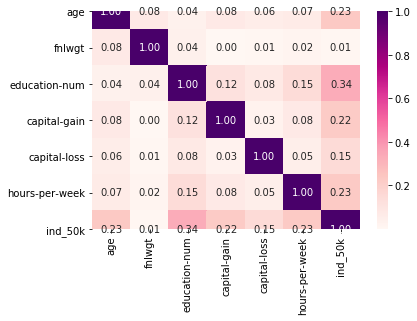

In [28]:
corr = df_50k.corr()
sns.heatmap(corr.abs(), 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="RdPu",
            annot=True,
            fmt= '.2f'
            )

###Correlação: Pearson

In [29]:
#Matriz de correlação
Matrix_Corr = df_50k.corr().where(np.triu(np.ones(df_50k.corr().shape), k=1).astype(np.bool))
Matrix_Corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,ind_50k
age,NaN,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,NaN,NaN,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,NaN,NaN,NaN,0.122630,0.079923,0.148123,0.335154
capital-gain,NaN,NaN,NaN,NaN,-0.031615,0.078409,0.223329
capital-loss,NaN,NaN,NaN,NaN,NaN,0.054256,0.150526
hours-per-week,NaN,NaN,NaN,NaN,NaN,NaN,0.229689
ind_50k,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
set_Colunas_Correlacionadas = set()

for i in range(len(Matrix_Corr.columns)):
    for j in range(i):
        if abs(Matrix_Corr.iloc[i, j]) != 0:
            colname = Matrix_Corr.columns[i]
            set_Colunas_Correlacionadas.add(colname)

set_Colunas_Correlacionadas

{'capital-gain',
 'capital-loss',
 'education-num',
 'fnlwgt',
 'hours-per-week',
 'ind_50k'}

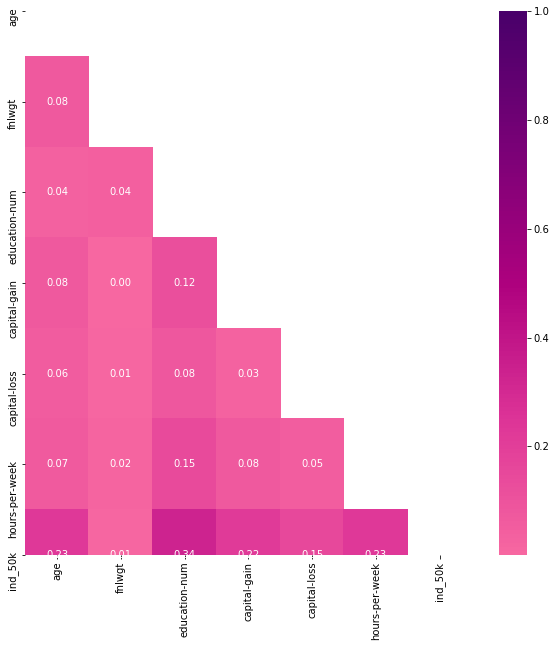

In [31]:
fig, ax = plt.subplots(figsize=(10, 10)) 
mask = np.zeros_like(df_50k.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_50k.corr().abs(), mask= mask, ax= ax, cmap='RdPu', annot= True, fmt= '.2f', center= 0)

##Estatísticas

In [32]:
df_50k.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,ind_50k
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [33]:
df_50k.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,flag_50k
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


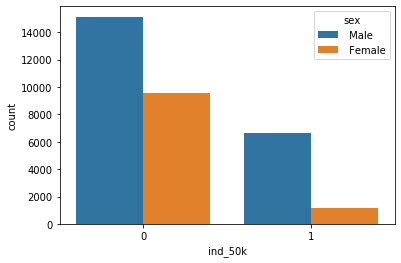

In [34]:
#Indicador dos 50K por Genero
sns.countplot(x='ind_50k', hue='sex', data=df_50k)

###Gráficos

In [0]:
#Subset do DataFrame (Series)
workclass    = df_50k['workclass']
education    = df_50k['education']
educationN   = df_50k['education-num']
race         = df_50k['race']
sex          = df_50k['sex']
natcountry   = df_50k['native-country']
hoursweek    = df_50k['hours-per-week'] 
relationship = df_50k['relationship']

**Distribuição da Raça**

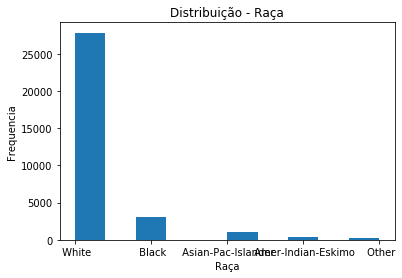

In [36]:
plt.hist(race)
plt.title('Distribuição - Raça')
plt.xlabel('Raça')
plt.ylabel('Frequencia')
plt.show()

**Histograma das Horas por Semana**

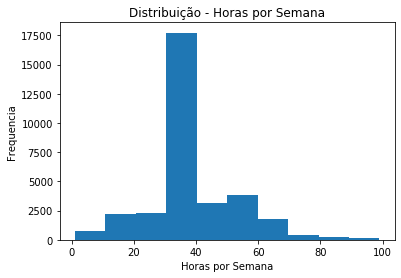

In [37]:
plt.hist(hoursweek)
plt.title('Distribuição - Horas por Semana')
plt.xlabel('Horas por Semana')
plt.ylabel('Frequencia')
plt.show()

**Relação do Grau de Escolaridade pela Raça**

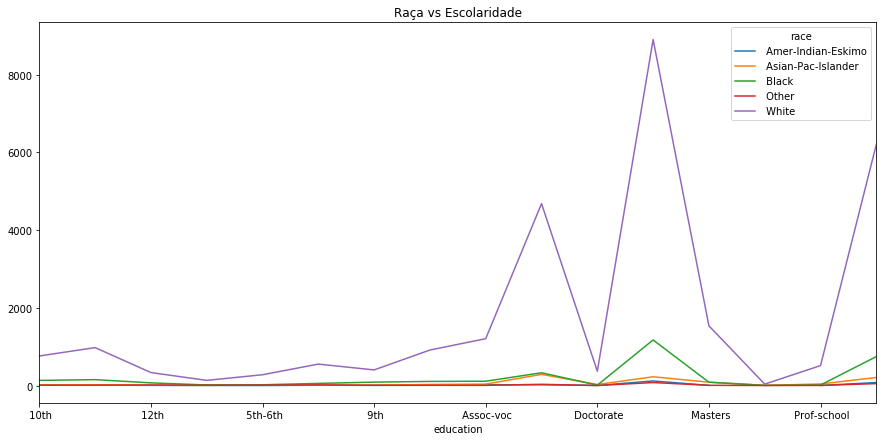

In [38]:
#Relação da Escolaridade e Raça
fig, ax = plt.subplots(figsize=(15,7))
df_50k.groupby(['education','race']).count()['age'].unstack().plot(ax=ax, title='Raça vs Escolaridade')

**Relação por Tipo de Familiar pelo Indicativo dos 50k**

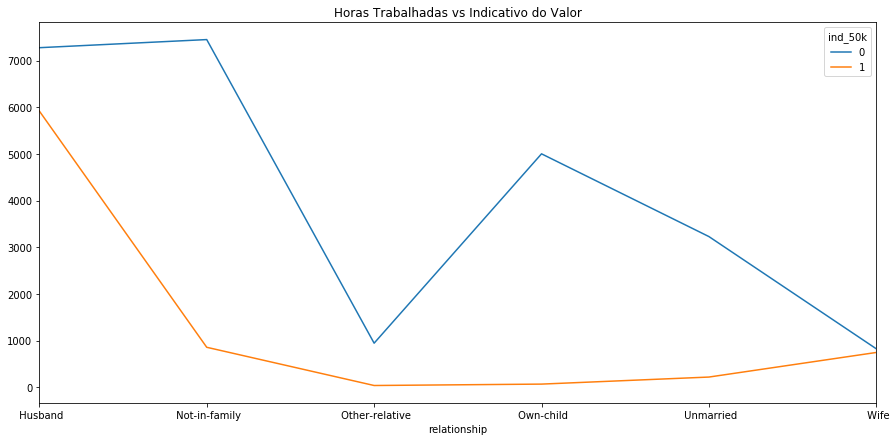

In [39]:
#Relação de horas trabalhadas pelo indicatico de valor
fig, ax = plt.subplots(figsize=(15,7))
df_50k.groupby(['relationship','ind_50k']).count()['age'].unstack().plot(ax=ax, title='Horas Trabalhadas vs Indicativo do Valor')

#**3DP - DATA PREPARATION**

> **Objetivos desta fase:** Coletar, preparar, transformar e limpar dados: remover duplicatas, corrigir erros, lidar com Missing Values, normalização, conversões de tipo de dados e etc.

*   **3DP_Feature Engineering**: derivar variaveis
*   **3DP_Missing Values Handling**: identificar e tratar os Missing Values
*   **3DP_Outliers Handling**: identificar e tratar os Outlier
*   **3DP_Data Transformation**: colocar as variáveis numa mesma escala (MinMaxScaler?)










###Verificar se há registos em duplicidade

In [40]:
#Lista das linhas duplicadas
df_50k[df_50k.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K,0
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K,0
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K,0
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K,0
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K,0
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K,0
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,0
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K,0
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K,0


In [41]:
print(f'Há {df_50k[df_50k.duplicated()].count()[0]} registos duplicados')

Há 24 registos duplicados


In [42]:
#Exclusão das linhas duplicadas
df_50k = df_50k.drop_duplicates()
print(f'Ficheiro com {df_50k.shape[0]} linhas e {df_50k.shape[1]} colunas') 

Ficheiro com 32537 linhas e 16 colunas


##Transformação

> Para as colunas do tipo *string*, eliminar espaços a direta/esquerda e converter as letras para minúsculas

In [0]:
def Transf_Lower(df):
    # Primeira transformação: Aplicar lower() nos nomes das COLUNAS:
    df.columns = [col.lower() for col in df.columns]

    # Segunda transformação: Aplicar o método .str.lower() nos valores das COLUNAS object/strings:
    l_ColsObject = df.select_dtypes(include=['object']).columns
    for col in l_ColsObject:
        df[col]= df[col].str.lower().str.strip()     

In [44]:
Transf_Lower(df_50k)
df_50k.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k,0
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k,0
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k,0
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k,0
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k,0


In [45]:
Transf_Lower(df_50k_test)
df_50k_test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k
0,25,private,226802,11th,7,never-married,machine-op-inspct,own-child,black,male,0,0,40,united-states,<=50k.,0
1,38,private,89814,hs-grad,9,married-civ-spouse,farming-fishing,husband,white,male,0,0,50,united-states,<=50k.,0
2,28,local-gov,336951,assoc-acdm,12,married-civ-spouse,protective-serv,husband,white,male,0,0,40,united-states,>50k.,1
3,44,private,160323,some-college,10,married-civ-spouse,machine-op-inspct,husband,black,male,7688,0,40,united-states,>50k.,1
4,18,?,103497,some-college,10,never-married,?,own-child,white,female,0,0,30,united-states,<=50k.,0


###Scaler

## Missing Values

**No dataframe, o valor "?" será classificado como um *Missing Value*.** 

Segue a quantidade de registos que contém MV (e sua porcentagem)

In [46]:
# O valor "?" aparece nas colunas "workclass", "occupation" e "native-country".
n_mv_workclass  = df_50k[df_50k["workclass"].isin(["?"])].count()[0]
n_mv_occupation = df_50k[df_50k["occupation"].isin(["?"])].count()[0]
n_mv_country    = df_50k[df_50k["native-country"].isin(["?"])].count()[0]

print(f'{n_mv_workclass} registos tem a coluna "workclass" com Missing Value ({round((n_mv_workclass*100)/df_50k.shape[0],2)}%)') 
print(f'{n_mv_occupation} registos tem a coluna "occupation" com Missing Value ({round((n_mv_occupation*100)/df_50k.shape[0],2)}%)') 
print(f'{n_mv_country} registos tem a coluna "native-country" com Missing Value ({round((n_mv_country*100)/df_50k.shape[0],2)}%)') 

1836 registos tem a coluna "workclass" com Missing Value (5.64%)
1843 registos tem a coluna "occupation" com Missing Value (5.66%)
582 registos tem a coluna "native-country" com Missing Value (1.79%)


A quantidade de registos que contém "?" nas três colunas é muito baixa:

In [47]:
# Registos onde "?" aparece nas 3 colunas
F1 = df_50k["workclass"].isin(["?"]) 
F2 = df_50k["occupation"].isin(["?"]) 
F3 = df_50k["native-country"].isin(["?"]) 
  
f'{df_50k[F1 & F2 & F3].shape[0]} registos'

'27 registos'

> **Quanto aos MVs, opta-se inicialmente por não aplicar qualquer alteração/substituição**

In [0]:
def Replace_MV(df):
    #Obter as coluanas string
    l_ColsObject = df.select_dtypes(include=['object']).columns

    #Substituir "?" pel o valor de maior frequencia
    for col in l_ColsObject:
        df[col] = df[col].replace({"?" : df_50k[col].mode().iloc[0]})

In [0]:
#Substituir Missing Value
#Replace_MV(df_50k)

##Discretizar (???)

Construir intervalos/classes para variáveis numéricas.

In [50]:
#Colunas numericas
df_50k.select_dtypes(include=['number']).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'ind_50k'],
      dtype='object')

In [51]:
#Discretizar Age
df_50k['age_class'] = pd.qcut(df_50k['age'], 10, labels=False)
df_50k['age_class'].value_counts()

0    3888
4    3517
8    3461
2    3373
1    3297
5    3243
7    3163
6    3006
9    2998
3    2591
Name: age_class, dtype: int64

In [52]:
#Discretizar Age
df_50k_test['age_class'] = pd.qcut(df_50k_test['age'], 10, labels=False)
df_50k_test['age_class'].value_counts()

0    2002
6    1784
4    1750
5    1647
2    1637
1    1582
9    1579
7    1491
8    1487
3    1322
Name: age_class, dtype: int64

In [53]:
df_50k.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k,age_class
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k,0,5
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k,0,7
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k,0,5
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k,0,8
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k,0,2


In [0]:
#Pra que?
#pd.crosstab(df_50k['age_class'], df_50k['ind_50k'], margins=True)

##Preparando dados para treinamento/geração de modelo

In [0]:
def preparar_dataframe_tipo_50k(i_df_50k):
  return i_df_50k.loc[:,['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].join(pd.get_dummies(i_df_50k.loc[:,['workclass','education','marital-status','occupation','relationship','race','sex','native-country']])), i_df_50k.loc[:,['ind_50k']]

In [0]:
df_50k_X, df_50k_y = preparar_dataframe_tipo_50k(df_50k)

In [57]:
df_50k_X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_assoc-acdm,education_assoc-voc,education_bachelors,education_doctorate,education_hs-grad,education_masters,education_preschool,education_prof-school,education_some-college,marital-status_divorced,marital-status_married-af-spouse,marital-status_married-civ-spouse,marital-status_married-spouse-absent,marital-status_never-married,marital-status_separated,marital-status_widowed,occupation_?,occupation_adm-clerical,...,native-country_canada,native-country_china,native-country_columbia,native-country_cuba,native-country_dominican-republic,native-country_ecuador,native-country_el-salvador,native-country_england,native-country_france,native-country_germany,native-country_greece,native-country_guatemala,native-country_haiti,native-country_holand-netherlands,native-country_honduras,native-country_hong,native-country_hungary,native-country_india,native-country_iran,native-country_ireland,native-country_italy,native-country_jamaica,native-country_japan,native-country_laos,native-country_mexico,native-country_nicaragua,native-country_outlying-us(guam-usvi-etc),native-country_peru,native-country_philippines,native-country_poland,native-country_portugal,native-country_puerto-rico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_united-states,native-country_vietnam,native-country_yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
df_50k_y

,ind_50k
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [59]:
df_50k_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k,age_class
0,25,private,226802,11th,7,never-married,machine-op-inspct,own-child,black,male,0,0,40,united-states,<=50k.,0,1
1,38,private,89814,hs-grad,9,married-civ-spouse,farming-fishing,husband,white,male,0,0,50,united-states,<=50k.,0,5
2,28,local-gov,336951,assoc-acdm,12,married-civ-spouse,protective-serv,husband,white,male,0,0,40,united-states,>50k.,1,2
3,44,private,160323,some-college,10,married-civ-spouse,machine-op-inspct,husband,black,male,7688,0,40,united-states,>50k.,1,6
4,18,?,103497,some-college,10,never-married,?,own-child,white,female,0,0,30,united-states,<=50k.,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,private,215419,bachelors,13,divorced,prof-specialty,not-in-family,white,female,0,0,36,united-states,<=50k.,0,5
16277,64,?,321403,hs-grad,9,widowed,?,other-relative,black,male,0,0,40,united-states,<=50k.,0,9
16278,38,private,374983,bachelors,13,married-civ-spouse,prof-specialty,husband,white,male,0,0,50,united-states,<=50k.,0,5
16279,44,private,83891,bachelors,13,divorced,adm-clerical,own-child,asian-pac-islander,male,5455,0,40,united-states,<=50k.,0,6


In [0]:
df_50k_test_X, df_50k_test_y = preparar_dataframe_tipo_50k(df_50k_test)

In [61]:
df_50k_test_X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_assoc-acdm,education_assoc-voc,education_bachelors,education_doctorate,education_hs-grad,education_masters,education_preschool,education_prof-school,education_some-college,marital-status_divorced,marital-status_married-af-spouse,marital-status_married-civ-spouse,marital-status_married-spouse-absent,marital-status_never-married,marital-status_separated,marital-status_widowed,occupation_?,occupation_adm-clerical,...,native-country_cambodia,native-country_canada,native-country_china,native-country_columbia,native-country_cuba,native-country_dominican-republic,native-country_ecuador,native-country_el-salvador,native-country_england,native-country_france,native-country_germany,native-country_greece,native-country_guatemala,native-country_haiti,native-country_honduras,native-country_hong,native-country_hungary,native-country_india,native-country_iran,native-country_ireland,native-country_italy,native-country_jamaica,native-country_japan,native-country_laos,native-country_mexico,native-country_nicaragua,native-country_outlying-us(guam-usvi-etc),native-country_peru,native-country_philippines,native-country_poland,native-country_portugal,native-country_puerto-rico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_united-states,native-country_vietnam,native-country_yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16277,64,321403,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16278,38,374983,13,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16279,44,83891,13,5455,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [62]:
df_50k_test_y

,ind_50k
0,0
1,0
2,1
3,1
4,0
...,...
16276,0
16277,0
16278,0
16279,0


In [63]:
# Lista colunas que existem em df_50k_X mas não existem em df_50k_test_X
list(set(df_50k_X.columns) - set(df_50k_test_X.columns))

['native-country_holand-netherlands']

In [64]:
# Cria em df_50k_test_X colunas que existem em df_50k_X mas não existem em df_50k_test_X, preenchendo com valor default 0
for val in list(set(df_50k_X.columns) - set(df_50k_test_X.columns)):
  df_50k_test_X[val] = 0

df_50k_test_X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_assoc-acdm,education_assoc-voc,education_bachelors,education_doctorate,education_hs-grad,education_masters,education_preschool,education_prof-school,education_some-college,marital-status_divorced,marital-status_married-af-spouse,marital-status_married-civ-spouse,marital-status_married-spouse-absent,marital-status_never-married,marital-status_separated,marital-status_widowed,occupation_?,occupation_adm-clerical,...,native-country_canada,native-country_china,native-country_columbia,native-country_cuba,native-country_dominican-republic,native-country_ecuador,native-country_el-salvador,native-country_england,native-country_france,native-country_germany,native-country_greece,native-country_guatemala,native-country_haiti,native-country_honduras,native-country_hong,native-country_hungary,native-country_india,native-country_iran,native-country_ireland,native-country_italy,native-country_jamaica,native-country_japan,native-country_laos,native-country_mexico,native-country_nicaragua,native-country_outlying-us(guam-usvi-etc),native-country_peru,native-country_philippines,native-country_poland,native-country_portugal,native-country_puerto-rico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_united-states,native-country_vietnam,native-country_yugoslavia,native-country_holand-netherlands
0,25,226802,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,18,103497,10,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16277,64,321403,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16278,38,374983,13,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16279,44,83891,13,5455,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [65]:
#Removendo as colunas ?
for val in list(df_50k_X.columns):
  if "?" in val:
    df_50k_X.drop(columns=[val], inplace=True)

df_50k_X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_assoc-acdm,education_assoc-voc,education_bachelors,education_doctorate,education_hs-grad,education_masters,education_preschool,education_prof-school,education_some-college,marital-status_divorced,marital-status_married-af-spouse,marital-status_married-civ-spouse,marital-status_married-spouse-absent,marital-status_never-married,marital-status_separated,marital-status_widowed,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,...,native-country_canada,native-country_china,native-country_columbia,native-country_cuba,native-country_dominican-republic,native-country_ecuador,native-country_el-salvador,native-country_england,native-country_france,native-country_germany,native-country_greece,native-country_guatemala,native-country_haiti,native-country_holand-netherlands,native-country_honduras,native-country_hong,native-country_hungary,native-country_india,native-country_iran,native-country_ireland,native-country_italy,native-country_jamaica,native-country_japan,native-country_laos,native-country_mexico,native-country_nicaragua,native-country_outlying-us(guam-usvi-etc),native-country_peru,native-country_philippines,native-country_poland,native-country_portugal,native-country_puerto-rico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_united-states,native-country_vietnam,native-country_yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
#Removendo as colunas ?
for val in list(df_50k_test_X.columns):
  if "?" in val:
    df_50k_test_X.drop(columns=[val], inplace=True)

df_50k_test_X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_assoc-acdm,education_assoc-voc,education_bachelors,education_doctorate,education_hs-grad,education_masters,education_preschool,education_prof-school,education_some-college,marital-status_divorced,marital-status_married-af-spouse,marital-status_married-civ-spouse,marital-status_married-spouse-absent,marital-status_never-married,marital-status_separated,marital-status_widowed,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,...,native-country_canada,native-country_china,native-country_columbia,native-country_cuba,native-country_dominican-republic,native-country_ecuador,native-country_el-salvador,native-country_england,native-country_france,native-country_germany,native-country_greece,native-country_guatemala,native-country_haiti,native-country_honduras,native-country_hong,native-country_hungary,native-country_india,native-country_iran,native-country_ireland,native-country_italy,native-country_jamaica,native-country_japan,native-country_laos,native-country_mexico,native-country_nicaragua,native-country_outlying-us(guam-usvi-etc),native-country_peru,native-country_philippines,native-country_poland,native-country_portugal,native-country_puerto-rico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_united-states,native-country_vietnam,native-country_yugoslavia,native-country_holand-netherlands
0,25,226802,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,18,103497,10,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16277,64,321403,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16278,38,374983,13,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16279,44,83891,13,5455,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


###Refazendo a matriz de correlação

In [0]:
corr = df_50k_X.join(df_50k_y).corr()
#sns.heatmap(corr.abs(), 
#            xticklabels=corr.columns,
#            yticklabels=corr.columns,
#            cmap="RdPu",
#            annot=True,
#            fmt= '.2f'
#            )

In [0]:
# Removendo colunas de correlação menor do que ?
if False: # Não trouxe melhorias
  for var in list(corr.index):
    if abs(corr.loc[:,['ind_50k']].loc[var].item()) < 0.2:
      if var in df_50k_X.columns:
        df_50k_X.drop(columns=[var], inplace=True)
      if var in df_50k_test_X.columns:
        df_50k_test_X.drop(columns=[var], inplace=True)

#**4M - MODELING**

> Aplicar algoritmos (*Supervised* vs *Unsupervised Learning*).

##imports

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from time import time
from operator import itemgetter
from scipy.stats import randint

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

np.set_printoptions(suppress=True)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


##Método da matriz de confusão

In [0]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=False,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize= (8,8),
                          cmap='Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

##Parametrização

In [0]:
i_CV= 10 # Número de Cross-Validations
i_Seed= 20111974 # semente por questões de reproducibilidade
f_Test_Size= 0.3

##Carregamento dos dados(Sem CSV :( )

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

copyDataframe = df_50k.copy()
copyDataframe.head()

copyDataframe['sex'].unique()
copyDataframe['race'].unique()

le = LabelEncoder()
copyDataframe['sex_le'] = le.fit_transform(copyDataframe['sex'])
copyDataframe['race_le'] = le.fit_transform(copyDataframe['race'])
copyDataframe['marital_status_le'] = le.fit_transform(copyDataframe['marital-status'])
copyDataframe['relationship_le'] = le.fit_transform(copyDataframe['relationship'])
copyDataframe['flag_50k_le'] = le.fit_transform(copyDataframe['flag_50k'])


dummiesSex= pd.get_dummies(copyDataframe['sex'])
copyDataframe= pd.concat([copyDataframe, dummiesSex], axis= 1)

dummiesRace= pd.get_dummies(copyDataframe['race'])
copyDataframe= pd.concat([copyDataframe, dummiesRace], axis= 1)

dummiesMaritalStatus= pd.get_dummies(copyDataframe['marital-status'])
copyDataframe= pd.concat([copyDataframe, dummiesMaritalStatus], axis= 1)

dummiesRelationship= pd.get_dummies(copyDataframe['relationship'])
copyDataframe= pd.concat([copyDataframe, dummiesRelationship], axis= 1)

copyDataframe.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k,ind_50k,age_class,sex_le,race_le,marital_status_le,relationship_le,flag_50k_le,female,male,amer-indian-eskimo,asian-pac-islander,black,other,white,divorced,married-af-spouse,married-civ-spouse,married-spouse-absent,never-married,separated,widowed,husband,not-in-family,other-relative,own-child,unmarried,wife
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k,0,5,1,4,4,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k,0,7,1,4,2,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k,0,5,1,4,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k,0,8,1,2,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k,0,2,0,2,2,5,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


##Carregamento dos dados (CSV pré processados)

Massao: fiz uma preparação básica dos dados com PostgreSQL, mas todas as transformações (basicamente adição de dummy columns) podem ser facilmente feitas via Pandas.

In [73]:
X_train = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_data_dataset.csv', index_col= 'id');
X_train.head()

,age,workclass_fg,workclass_lg,workclass_nw,workclass_p,workclass_sei,workclass_seni,workclass_g,workclass_wp,fnlwgt,education_num,marital_status_d,marital_status_mas,marital_status_mcs,marital_status_msa,marital_status_nm,marital_status_s,marital_status_w,occupation_ac,occupation_af,occupation_cr,occupation_em,occupation_fs,occupation_hc,occupation_moi,occupation_os,occupation_phs,occupation_ps,occupation_pts,occupation_s,occupation_ts,occupation_tm,relationship_h,relationship_oc,relationship_w,relationship_nif,relationship_u,relationship_or,race_b,race_api,...,native_country_02,native_country_03,native_country_04,native_country_05,native_country_06,native_country_07,native_country_08,native_country_09,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,19,0,0,0,0,0,0,0,0,117201,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41,0,1,0,0,0,0,0,0,22155,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,39,0,0,0,0,0,0,0,0,179352,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,46,0,0,0,1,0,0,0,0,109089,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,51,0,0,0,1,0,0,0,0,249741,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [74]:
y_train = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_data_target.csv', index_col= 'id');
y_train.head()

,target
id,
1,0
2,0
3,0
4,0
5,0


In [75]:
X_test = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_test_dataset.csv', index_col= 'id');
X_test.head()

,age,workclass_fg,workclass_lg,workclass_nw,workclass_p,workclass_sei,workclass_seni,workclass_g,workclass_wp,fnlwgt,education_num,marital_status_d,marital_status_mas,marital_status_mcs,marital_status_msa,marital_status_nm,marital_status_s,marital_status_w,occupation_ac,occupation_af,occupation_cr,occupation_em,occupation_fs,occupation_hc,occupation_moi,occupation_os,occupation_phs,occupation_ps,occupation_pts,occupation_s,occupation_ts,occupation_tm,relationship_h,relationship_oc,relationship_w,relationship_nif,relationship_u,relationship_or,race_b,race_api,...,native_country_02,native_country_03,native_country_04,native_country_05,native_country_06,native_country_07,native_country_08,native_country_09,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22,0,0,0,0,0,0,0,0,213291,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,19,0,0,0,0,0,0,0,0,47235,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,73,0,0,0,1,0,0,0,0,113446,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,57,0,0,0,0,0,0,0,0,274680,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,28,0,0,0,1,0,0,0,0,173858,9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
y_test = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_test_target.csv', index_col= 'id');
y_test.head()

,target
id,
1,0
2,0
3,1
4,0
5,0


##Decision Tree

In [0]:
class ProcessDecisionTree:
  def __init__(self,
               iSeed,
               iCV,
               X_train,
               y_train,
               y_test,
               X_test, 
               make_confusion_matrix,
               criterion='gini',
               splitter='best',
               max_depth=None,
               min_samples_split=2,
               min_samples_leaf=1,
               min_impurity_decrease=0.0,
               min_impurity_split=None,
               presort=False,
               class_weight=None,
               max_leaf_nodes=None,
               max_features=None,
               min_weight_fraction_leaf=0.0):
    self.criterion=criterion
    self.splitter=splitter
    self.max_depth=max_depth
    self.min_samples_split=min_samples_split
    self.min_samples_leaf=min_samples_leaf
    self.min_impurity_decrease=min_impurity_decrease
    self.min_impurity_split=min_impurity_split
    self.presort=presort
    self.class_weight=class_weight
    self.max_leaf_nodes=max_leaf_nodes
    self.max_features=max_features
    self.min_weight_fraction_leaf=min_weight_fraction_leaf
    self.random_state=iSeed
    self.cv=iCV
    self.X_train=X_train
    self.y_train=y_train
    self.y_test=y_test
    self.X_test=X_test
    self.make_confusion_matrix=make_confusion_matrix

  def start(self):
    self.Model_DT = DecisionTreeClassifier(criterion=self.criterion, 
                                           splitter=self.splitter, 
                                           max_depth=self.max_depth, 
                                           min_samples_split=self.min_samples_split, 
                                           min_samples_leaf=self.min_samples_leaf, 
                                           min_weight_fraction_leaf=self.min_weight_fraction_leaf, 
                                           max_features=self.max_features, 
                                           random_state=self.random_state, 
                                           max_leaf_nodes=self.max_leaf_nodes, 
                                           min_impurity_decrease=self.min_impurity_decrease, 
                                           min_impurity_split=self.min_impurity_split, 
                                           class_weight=self.class_weight, 
                                           presort=self.presort)
    self.Model_DT.fit(self.X_train, self.y_train)
    self.a_Scores_CV = cross_val_score(self.Model_DT, self.X_train, self.y_train, cv=self.cv)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(self.a_Scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(self.a_Scores_CV.std(),4)}')
    print(f'Acurácias: {self.a_Scores_CV}')

    self.y_pred = self.Model_DT.predict(self.X_test)

    #Confusion Matrix
    self.cf_matrix = confusion_matrix(self.y_test, self.y_pred)
    self.cf_labels = ['True Neg','False Pos','False Neg','True Pos']
    self.cf_categories = ['Zero', 'One']
    self.make_confusion_matrix(self.cf_matrix, group_names= self.cf_labels, categories= self.cf_categories)

Média das Acurácias calculadas pelo CV....: 81.67
std médio das Acurácias calculadas pelo CV: 0.84
Acurácias: [0.80810562 0.81449631 0.81695332 0.80804668 0.82371007 0.81234644
 0.8215602  0.82463145 0.83261671 0.8046683 ]


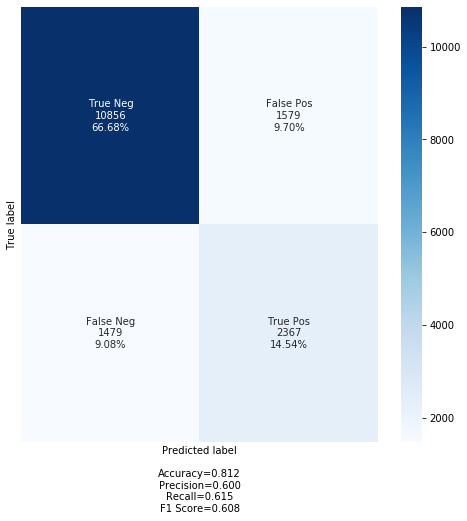

In [78]:
# Dados crus como base de comparação
decisionTree_orig = ProcessDecisionTree(i_Seed, i_CV, X_train, y_train, y_test, X_test, make_confusion_matrix)
decisionTree_orig.start()

Média das Acurácias calculadas pelo CV....: 81.71000000000001
std médio das Acurácias calculadas pelo CV: 0.9900000000000001
Acurácias: [0.81315304 0.80977259 0.8079287  0.81161647 0.82145052 0.81407498
 0.82913337 0.81960664 0.83891792 0.80504305]


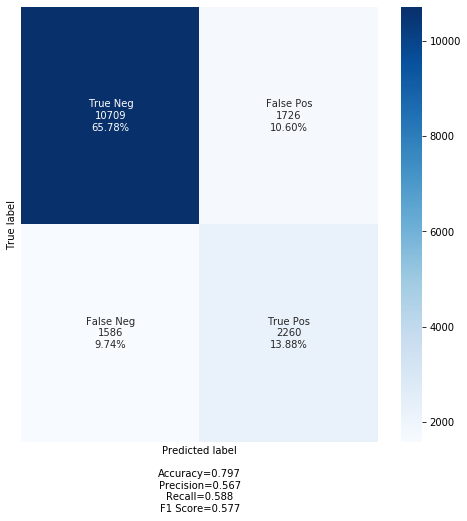

In [79]:
# Dados pós-processados via Python
decisionTree_2 = ProcessDecisionTree(i_Seed, i_CV, df_50k_X, df_50k_y, df_50k_test_y, df_50k_test_X, make_confusion_matrix)
decisionTree_2.start()

###Rascunho

In [80]:
# Instancia...
Model_DT= DecisionTreeClassifier(criterion='gini', splitter='best', 
                 max_depth=None, min_samples_split=2, 
                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                 max_features=None, random_state= i_Seed, 
                 max_leaf_nodes=None, min_impurity_decrease=0.0, 
                 min_impurity_split=None, class_weight=None, 
                 presort=False)

# Treina...
Model_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [81]:
# Cross-Validation com 10 folds
a_Scores_CV = cross_val_score(Model_DT, X_train, y_train, cv= i_CV)
print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_Scores_CV.mean(),4)}')
print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_Scores_CV.std(),4)}')

Média das Acurácias calculadas pelo CV....: 81.67
std médio das Acurácias calculadas pelo CV: 0.84


In [82]:
print(f'Acurácias: {a_Scores_CV}')

Acurácias: [0.80810562 0.81449631 0.81695332 0.80804668 0.82371007 0.81234644
 0.8215602  0.82463145 0.83261671 0.8046683 ]


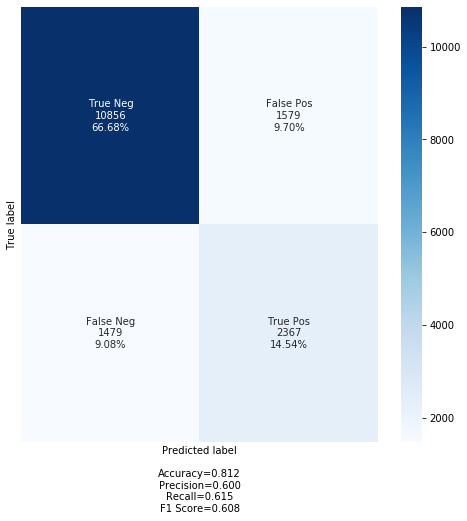

In [83]:
# Faz predições...
y_pred = Model_DT.predict(X_test)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

##Random Forest

In [0]:
class ProcessRandomForest:
  def __init__(self, iSeed,
               iCV, X_train, 
               y_train, y_test,
               X_test, n_estimators=100, 
               min_samples_split= 2, max_features="auto"):
    self.n_estimators = n_estimators
    self.min_samples_split = min_samples_split
    self.max_features = max_features
    self.iSeed = iSeed
    self.iCV = iCV
    self.X_train = X_train
    self.y_train = y_train
    self.y_test = y_test
    self.X_test = X_test

  def start(self):
    self.Model_RF= RandomForestClassifier(n_estimators=self.n_estimators, min_samples_split=self.min_samples_split, max_features=self.max_features, random_state= self.iSeed)
    self.Model_RF.fit(self.X_train, self.y_train)

    # Cross-Validation com 10 folds
    self.a_Scores_CV = cross_val_score(self.Model_RF, self.X_train, self.y_train, cv= self.iCV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(self.a_Scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(self.a_Scores_CV.std(),4)}')

    print(f'Acurácias: {self.a_Scores_CV}')
    
    # Faz predições...
    self.y_pred = self.Model_RF.predict(self.X_test)

    # Confusion Matrix
    self.cf_matrix = confusion_matrix(self.y_test, self.y_pred)
    self.cf_labels = ['True Neg','False Pos','False Neg','True Pos']
    self.cf_categories = ['Zero', 'One']
    make_confusion_matrix(self.cf_matrix, group_names = self.cf_labels, categories = self.cf_categories)

Média das Acurácias calculadas pelo CV....: 85.61999999999999
std médio das Acurácias calculadas pelo CV: 0.51
Acurácias: [0.84801965 0.86179361 0.85841523 0.84674447 0.85995086 0.85227273
 0.85780098 0.85718673 0.86210074 0.85810811]


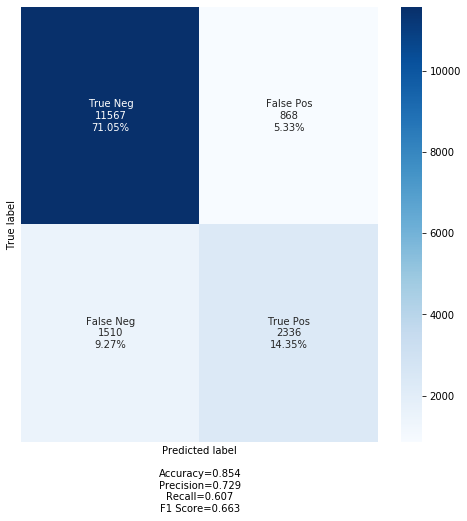

In [85]:
# Dados crus como base de comparação
processRandomForest_orig = ProcessRandomForest(i_Seed, i_CV, X_train, y_train, y_test, X_test)
processRandomForest_orig.start()

Média das Acurácias calculadas pelo CV....: 85.28999999999999
std médio das Acurácias calculadas pelo CV: 0.5700000000000001
Acurácias: [0.84480639 0.85955747 0.84910879 0.84419176 0.85402581 0.85003073
 0.8580209  0.8580209  0.86074393 0.85086101]


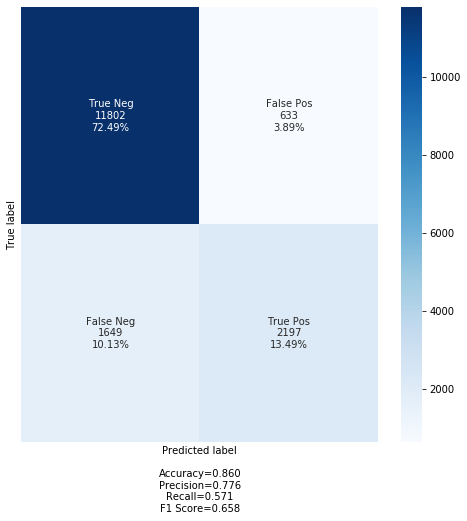

In [86]:
# Dados pós-processados via Python
processRandomForest_2 = ProcessRandomForest(i_Seed, i_CV, df_50k_X, df_50k_y, df_50k_test_y, df_50k_test_X)
processRandomForest_2.start()

###Rascunho

In [87]:
# Instancia...
Model_RF= RandomForestClassifier(n_estimators=100, min_samples_split= 2, max_features="auto", random_state= i_Seed)

# Treina...
Model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

In [88]:
# Cross-Validation com 10 folds
a_Scores_CV = cross_val_score(Model_RF, X_train, y_train, cv= i_CV)
print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_Scores_CV.mean(),4)}')
print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_Scores_CV.std(),4)}')

Média das Acurácias calculadas pelo CV....: 85.61999999999999
std médio das Acurácias calculadas pelo CV: 0.51


Massao: Como não foi feita nenhuma preparação dos dados, o resultado é mediocre. Pode ser melhorado.

In [89]:
print(f'Acurácias: {a_Scores_CV}')

Acurácias: [0.84801965 0.86179361 0.85841523 0.84674447 0.85995086 0.85227273
 0.85780098 0.85718673 0.86210074 0.85810811]


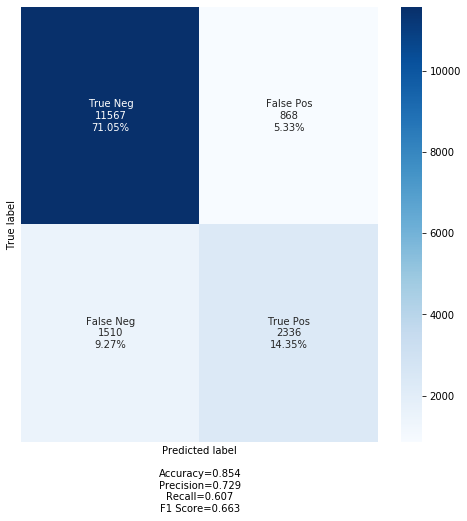

In [90]:
# Faz predições...
y_pred = Model_RF.predict(X_test)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

###Adaboost sobre Random Forest

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

processRandomForest_orig.Model_RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

In [92]:
Model_RF = processRandomForest_orig.Model_RF
# Instancia AdaBoostClassifier
Model_AB= AdaBoostClassifier(n_estimators=100, base_estimator= Model_RF, random_state= i_Seed)

# Treina...
Model_AB.fit(df_50k_X, df_50k_y)

# Atenção: 10 a 20 minutos de execução

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                        

In [0]:
# Cross-Validation com 10 folds
a_Scores_CV = cross_val_score(Model_AB, df_50k_X, df_50k_y, cv= i_CV)
print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_Scores_CV.mean(),4)}')
print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_Scores_CV.std(),4)}')

# Atenção OUT OF MEMORY

In [0]:
print(f'Acurácias: {a_Scores_CV}')

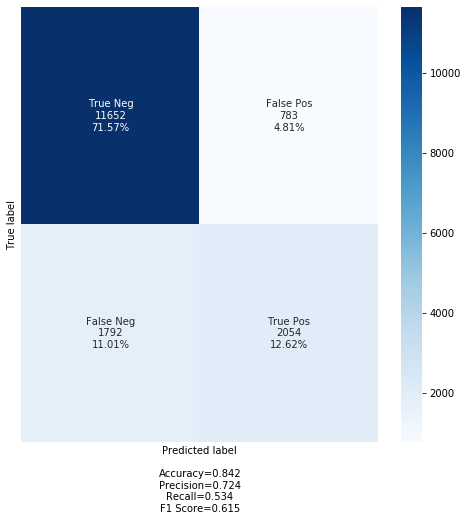

In [93]:
# Faz predições com os parametros otimizados...
y_pred = Model_AB.predict(df_50k_test_X)

# Confusion Matrix
cf_matrix = confusion_matrix(df_50k_test_y, y_pred)
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

#**5MSE - MODEL SELECTION AND EVALUATE**


> Aplicação das melhores métricas para avaliar o acurácia dos modelos de ML.

Não aplicável

#**6D - Deployment**

> Implementação do Modelo.

Não aplicável